<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK10_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀 소개

회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정값
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

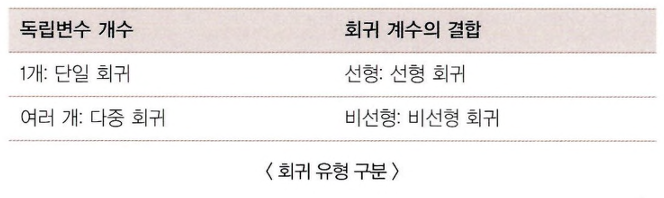

지도학습 유형 = 분류 & 회귀
> 분류는 예측값이 카테고리와 같은 이산형 클래스 값

> 회귀는 연속형 숫자 값

- 선형회귀는 실제값과 예측값의 차이(오류 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식

< 대표적 선형 회귀 모델 >
- 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
- 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델
> 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
- 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식
> L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해,
L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것, 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불림
- 엘라스틱넷(티asticNet): L2, L1 규제를 함께 결합한 모델, 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
- 로지스틱 회귀(Logistic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델, 로지스틱 회귀는 매우 강력한 분류 알고리즘
> 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

# 2. 단순 선형 회귀를 통한 회귀 이해

단순선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형회귀

1차 함수식으로 모델링

실제값과 회귀 모델의 차이에 따른 오류 값 = 잔차
- 최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차 합이 최소가 되는 모델을 만든다는 의미이며, 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미
- 전체 데이터의 오류 합을 구하는 것이 아닌, 절댓값을 취해서 더하거나(Mean Absolute Error) 오류 값의 제곱을 구해 더하는 방식(RSS, Residual Sum of
Square)을 취함
- 일반적으로 RSS 방식을 사용

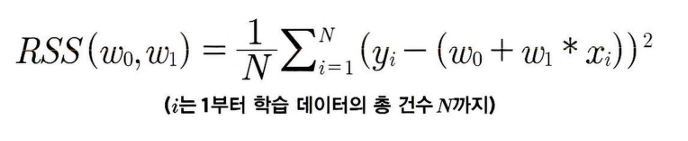

- 이 RSS를 최소로 하는 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항
- 학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주

# 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

- 경사하강법은 '**점진적으로**' 반복적인 계산을 통해 W 파라미터 값을 업데이트하며 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W 값을 계속 업데이트해 나감
- 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환

"어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?"



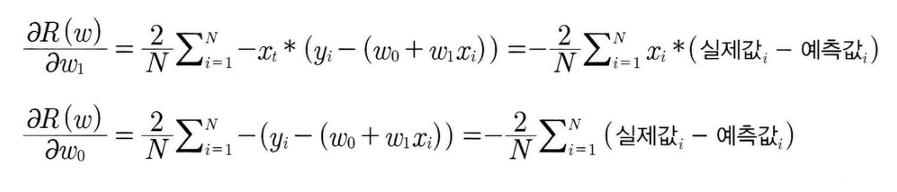

위 편미분 결괏값을 반복적으로 보정하며 W 값을 업데이트하면 R(w)가 최소가 되는 W 값을 구할 수 있음

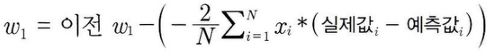

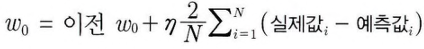

< 경사 하강법의 과정 >

1.  w1, w2를 임의의 값으로 설정하고 첫 비용 함수의 값 계산
2.  w1, w2를 위의 식으로 업데이트한 후 다시 비용함수(RSS)의 값 계산
3.  비용 함수가 감소하는 방향성으로 주어진 횟수만큼 2를 반복하며 w 계속 업데이트

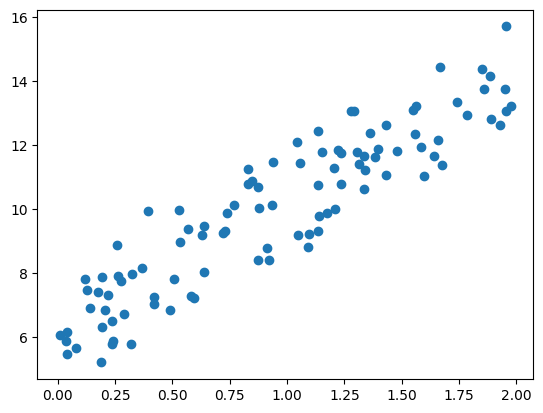

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4X+6을 근사(w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

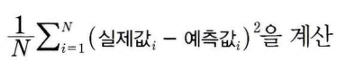

In [2]:
# 비용함수 정의
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)

  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1,w0

In [5]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


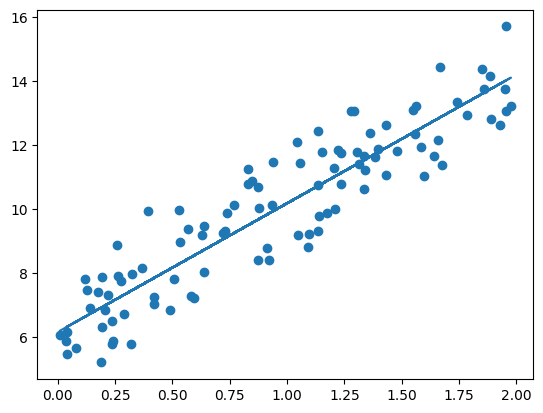

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있음
- 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용
- 확률적 경사 하강법은 전체 입력 데이터로 W가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 W가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장
- 따라서 대용량의 데이터의 경우 **확률적 경사 하강법**이나 **미니 배치 확률적 경사 하강법**을 이용해 최적 비용함수를 도출

In [7]:
# 미니 배치 확률적 경사 하강법 구현
## gradient_descent_steps()와 크게 다르진 않지만,
## 전체 데이터에서 랜덤하게 batch_size만큼 데이터를 추출한다는 점에서 차이가 있음

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  for ind in range(iters):
    np.random.seed(ind)

    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))

y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- 미니 배치 확률적 경사 하강법으로 구한 wO, w1 결과는 경사 하강법으로 구한 w1, wO와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금
높을 뿐으로 큰 예측 성능상의 차이가 없음
- 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용

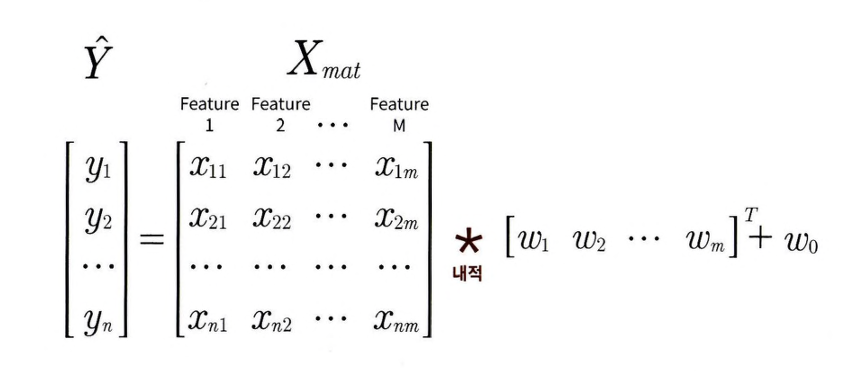

w0을 Weight의 배열 안에 포함시키기 위해 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat0 추가

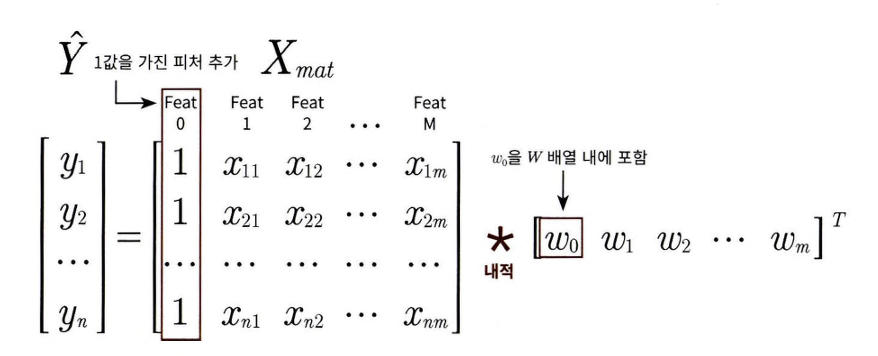

이제 회귀 예측값은 아래와 같음

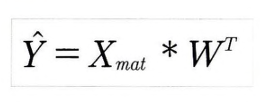

# 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

## LinearRegression 클래스 - Ordinary Least Squares

- LinearRegression 클래스는 예측값과 실제값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
- LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력받으면 회귀 계수인 W를 coef_ 속성에 저장

In [9]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True, n_jobs=1)

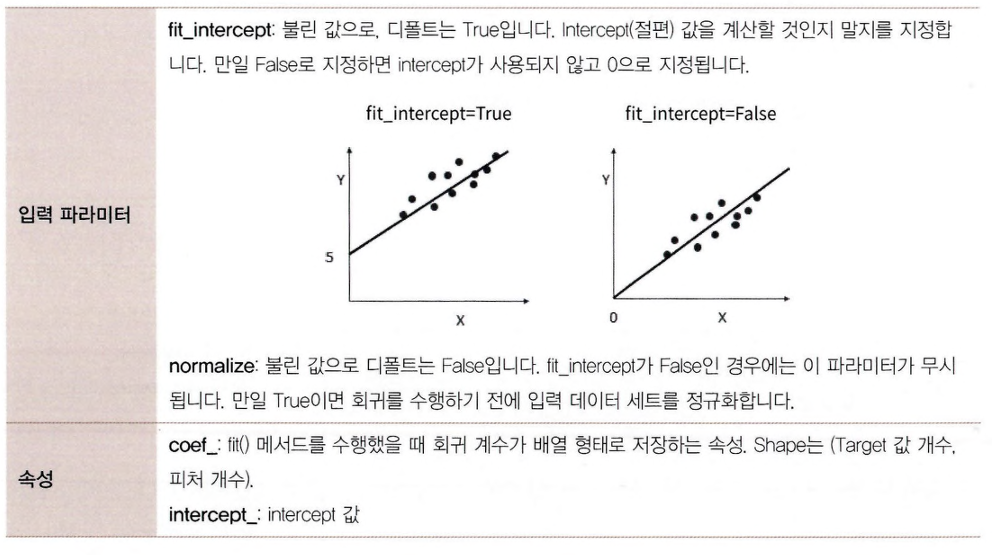

- OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음
- 피처 간 상관관계가 매우 높은 경우 분산이 커져 오류에 매우 민감해지는데, 이를 다중공선성 문제라고 부름
- 매우 많은 피처가 다중공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하기도 함

## 회귀 평가 지표

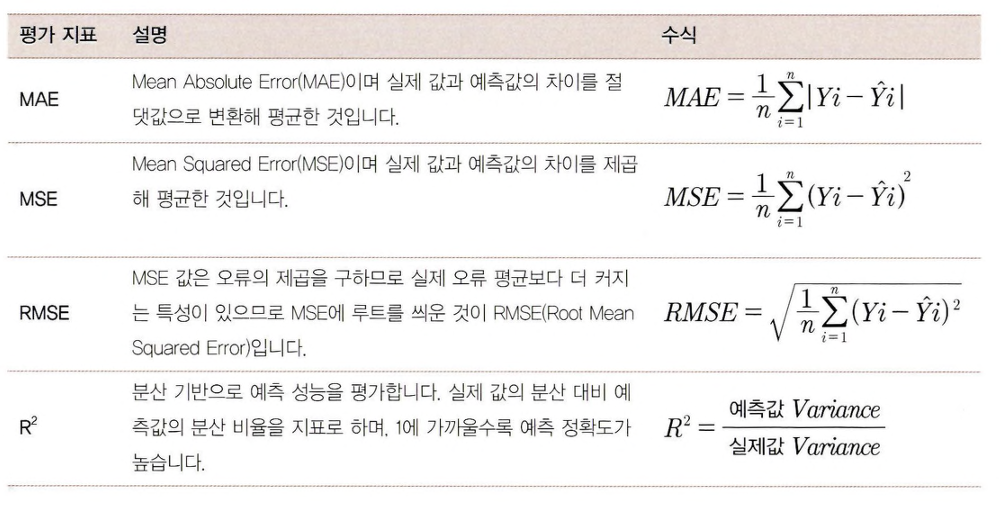

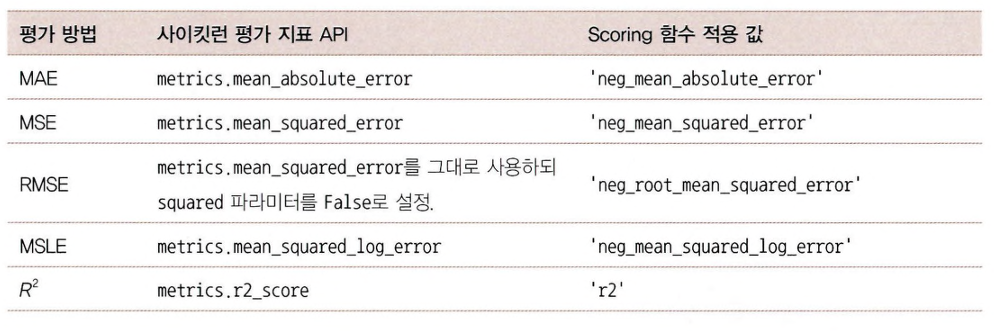

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

< 보스턴 주택 가격 데이터 >

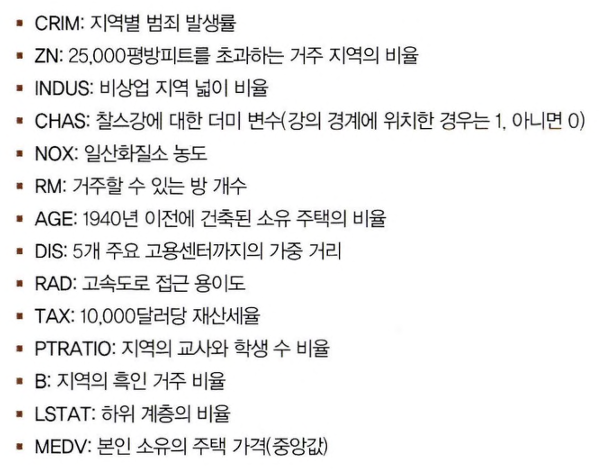

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터 가져오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostonDF = pd.DataFrame(data, columns=feature_names)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
display(bostonDF.head())

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


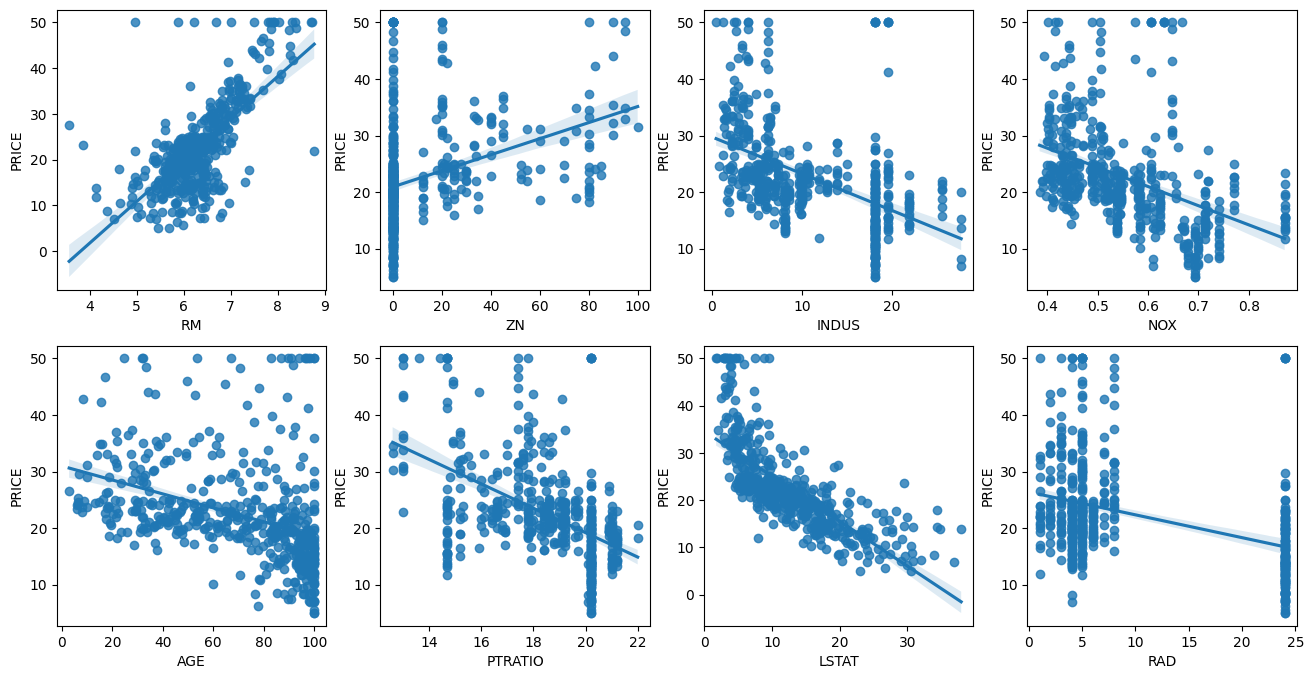

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT','RAD']

# lm_features의 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러짐
- RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 큼
- 즉, 방의 크기가 클수록 가격이 증가
- LSTAT(하위 계층의 비율)는 음 방향의 선형성 (Negative Linearity)이 가장 큼
- LSTAT이 적을수록 PRICE가 증가

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


 절편은 LinearRegression 객체의 intercept_속성에, 회귀 계수는 coef_ 속성에 값이 저장됨

In [13]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성
# 인덱스 칼럼명을 지정하지 않으면, 인덱스 숫자가 적힌 결과가 산출됨
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


- 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데 반해, 회귀는 MSE 값이 낮을수록 좋은 회귀 모델임
- 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 scoring = 'neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환
- 따라서 cross_val_score( )에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값이 됨

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


# 5. 다항 회귀와 과대적합/과소적합 이해

- 다항회귀 = 선형회귀
- 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관

PolynomialFeatures 클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

다른 전처리 변환클래스와 마찬가지로 fit(), transform() 메서드를 통해 이 같은 변환 작업을 수행

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성
# [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [20]:
# 3차 다항 계수
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [22]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계 모델링 가능
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
- 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 감소
- 즉, 차수가 높아질수록 과적합의 문제가 크게 발생

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_func(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func( )에서 약간의 노이즈 변동 값을 더한 값이다.
y = true_func(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


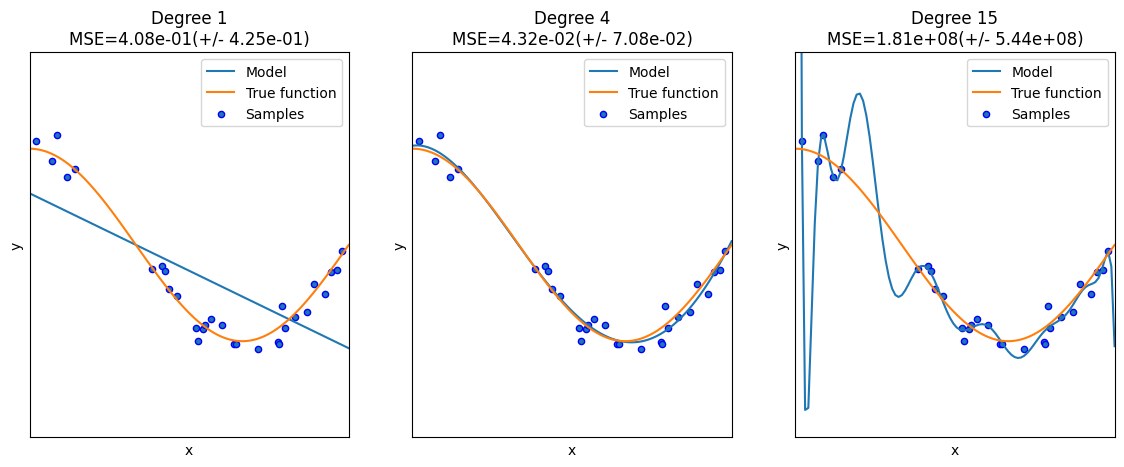

In [26]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키며 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)

  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)

  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

  # 실제값 곡선
  plt.plot(X_test, true_func(X_test), '-', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

- 파란색으로 표현된 예측 곡선 = 다항 회귀 예측 곡선
- 주황색으로 표현된 곡선 = 실제 데이터 세트 X, y의 코사인 곡선

1.  맨 왼쪽의 Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 동일, 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보임, 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 됨, MSE 값은 약 0.41

2.  가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사, 변동하는 잡음까지 예측하지는 못했지만 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 됨, MSE 값은 약 0.04로 가장 뛰어난 예측 성능을 나타냄

3.  맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 182581084.83이 될 정도로 어처구니없는 오류 값이 발(물론 과적합을 강조하기 위해 Degree를 매우 높은 차수인 15로 설정한 결과), 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과 예측 곡선이 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐, 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나옴

## 편향-분산 트레이드오프(Bias-Variance Trade off)

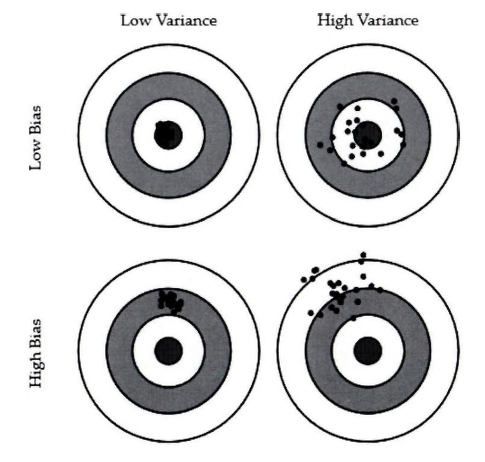

- 편향이 높으면 분산은 낮아지고(과소적합), 반대로 분산이 높으면 편향이 낮아짐(과적합)

< 편향과 분산의 관계에 따른 전체 오류 값의 변화 >
- 편향이 너무 높으면 전체 오류가 높음
- 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아짐
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨

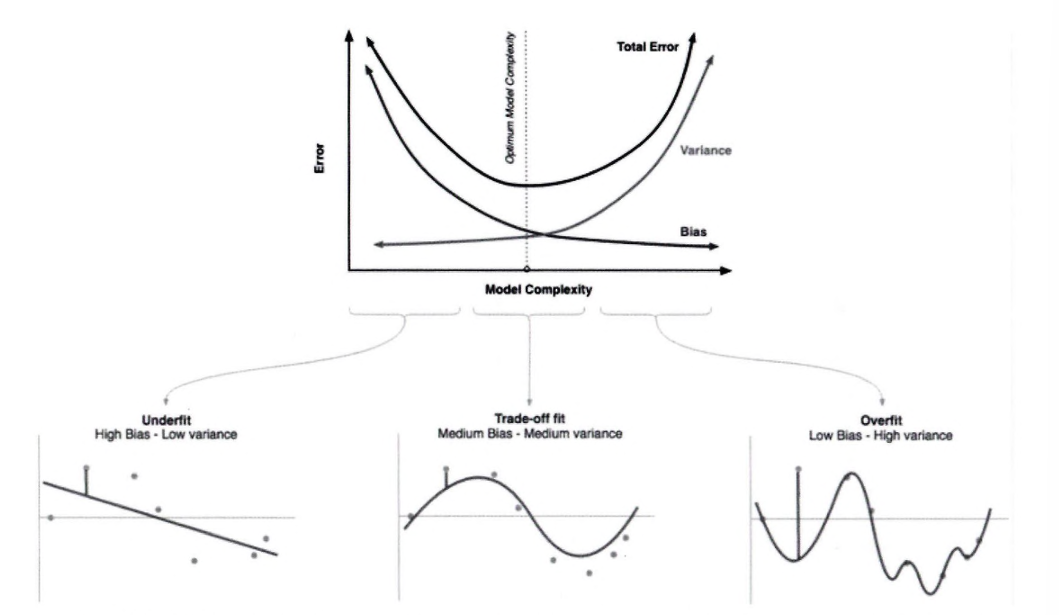